In [1]:
import tensorflow as tf
import magenta as mg
import numpy as np
import sys

from magenta.common import tf_lib

In [2]:
RL_CODE_PATH = "/home/natasha/Developer/magenta_my_fork/magenta/magenta/models/rl_tutor"

In [4]:
sys.path.append(RL_CODE_PATH)
import rl_tuner
import rl_tutor_ops

In [4]:
# Place to save your model checkpoints and composi|
SAVE_PATH = "/home/natasha/Dropbox (MIT)/Google/RL-RNN-Project/rl-rnn-output/"
NOTE_RNN_PATH = RL_CODE_PATH + '/note_rnn.ckpt'

In [5]:
# Model parameter settings
ALGORITHM = 'g'
REWARD_SCALER = 1
OUTPUT_EVERY_NTH = 1000
NUM_NOTES_IN_COMPOSITION = 32
PRIME_WITH_MIDI = False

In [6]:
rl_tuner_hparams = tf_lib.HParams(random_action_probability=0.1,
                                  store_every_nth=1,
                                  train_every_nth=5,
                                  minibatch_size=32,
                                  discount_rate=0.5,
                                  max_experience=100000,
                                  target_network_update_rate=0.01)

## Train network

In [7]:
reload(rl_tutor_ops)
reload(rl_tuner)
rl_tuner.reload_files()

In [8]:
rl_net = rl_tuner.RLTuner(SAVE_PATH, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH,
                          note_rnn_checkpoint_dir=RL_CODE_PATH,
                          note_rnn_checkpoint_file=NOTE_RNN_PATH)

In child class RL Tuner
num notes in melody came in as: 32
num notes in melody in class as: 32
In parent class RL Tutor



Successfully initialized internal nets from checkpoint!


Generated sequence: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


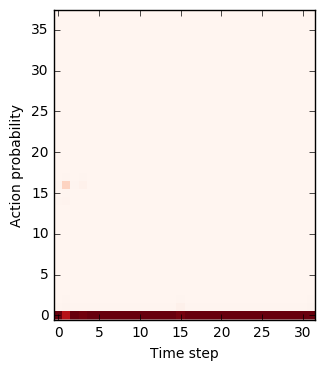

In [9]:
# Generate initial music sequence before training with RL
rl_net.generate_sample(visualize_probs=True, title='pre_rl', length=32)

In [10]:
rl_net.train(num_steps=10000, exploration_period=5000)

Evaluating initial model...
Evaluating model...
Training iteration 1000
	Reward for last 1000 steps: -539.407014475
		Domain reward: -539.407014475
		Reward RNN reward: -6314.05579507
	Exploration probability is 0.24382
Evaluating model...
Training iteration 2000
	Reward for last 1000 steps: -18815.6565777
		Domain reward: -18815.6565777
		Reward RNN reward: -1851.21792471
	Exploration probability is 0.1
Evaluating model...
Training iteration 3000
	Reward for last 1000 steps: -15620.5473743
		Domain reward: -15620.5473743
		Reward RNN reward: -1553.3747716
	Exploration probability is 0.1
Evaluating model...
Training iteration 4000
	Reward for last 1000 steps: -5805.41037831
		Domain reward: -5805.41037831
		Reward RNN reward: -2068.50109065
	Exploration probability is 0.1
Evaluating model...
Training iteration 5000
	Reward for last 1000 steps: -4724.41192221
		Domain reward: -4724.41192221
		Reward RNN reward: -2823.39943278
	Exploration probability is 0.1
Evaluating model...
Training 

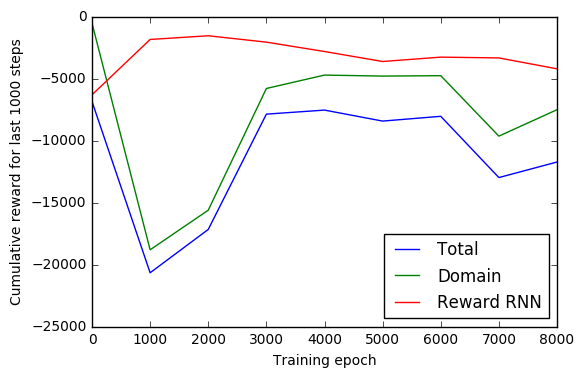

In [11]:
# Plot the rewards received during training. Improves as chance of random exploration action decreases.
rl_net.plot_rewards()

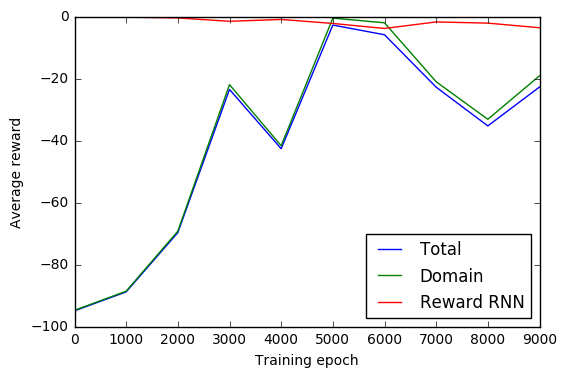

In [12]:
# Plot rewards received during calls to evaluation function throughout training. 
# Does not include exploration or random actions.
rl_net.plot_evaluation()

Generated sequence: [28, 28, 28, 28, 28, 3, 3, 3, 3, 22, 3, 22, 26, 26, 26, 26, 23, 22, 3, 3, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 3, 22]


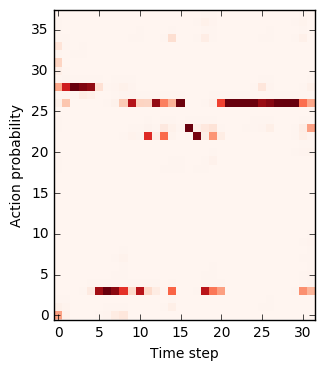

In [13]:
rl_net.generate_sample(visualize_probs=True, title='post_rl')

In [14]:
# If you're happy with the model, save a version!
rl_net.save_model('test_model', directory=SAVE_PATH)

In [15]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_music_theory_metrics(num_compositions=100)

Total compositions: 100.0
Total notes:3200.0
	Compositions starting with tonic: 15.0
	Compositions with unique highest note:30.0
	Compositions with unique lowest note:21.0
	Number of resolved leaps:34.0
	Number of double leaps:25.0
	Notes not in key:657.0
	Notes in motif:1592.0
	Notes in repeated motif:4.0
	Notes excessively repeated:377.0

	Percent compositions starting with tonic:0.15
	Percent compositions with unique highest note:0.3
	Percent compositions with unique lowest note:0.21
	Percent of leaps resolved:0.576271186441
	Percent notes not in key:0.2053125
	Percent notes in motif:0.4975
	Percent notes in repeated motif:0.00125
	Percent notes excessively repeated:0.1178125

	Average autocorrelation of lag1:0.461836136843
	Average autocorrelation of lag2:0.234400789937
	Average autocorrelation of lag3:0.0501773602254

	Avg. num octave jumps per composition:4.29
	Avg. num sevenths per composition:0.23
	Avg. num fifths per composition:0.3
	Avg. num sixths per composition:0.06
	Avg. 